In [8]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the required libraries

In [11]:
data = pd.read_excel('train_data_churn_analysis.xlsx')
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


Viewing the first five rows of the train data

In [12]:
data.shape

(6650, 11)

The train data has 6650 rows and 11 columns

In [13]:
data.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

There is no null value in the train data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


Some of the features like ID, Gender, Income, Product_Holdings, Credit_Category are object type. Others like Age, Balance,Vintage, Transaction_status, Credit_card, Is_churn are numerical.

In [15]:
data.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


([<matplotlib.patches.Wedge at 0x7ff21f55c850>,
 [Text(-0.8225396113375425, 0.7303619566904376, 'NOT CHURN'),
  Text(0.8225396455282523, -0.7303619181845787, 'CHURN')],
 [Text(-0.44865796982047773, 0.398379249103875, '76.9%'),
  Text(0.44865798846995575, -0.3983792281006793, '23.1%')])

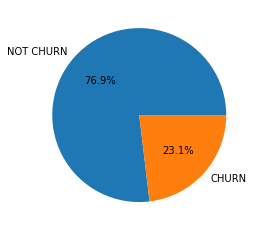

In [16]:
churn = data['Is_Churn'].value_counts()
label = ['NOT CHURN', 'CHURN']
plt.pie(churn, labels  = label, autopct='%1.1f%%')

There is problem of class imbalance

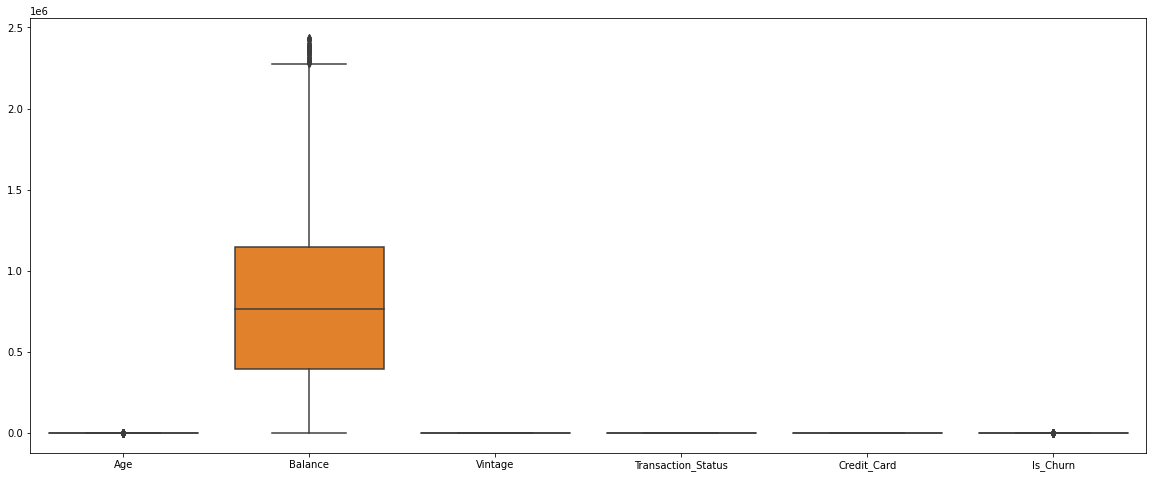

In [17]:
fig, ax = plt.subplots(1,1,figsize = (20,8))
sns.boxplot(data = data, ax = ax)
plt.show()

There are outliers in the balance variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff21f30fad0>,
      dtype=object)

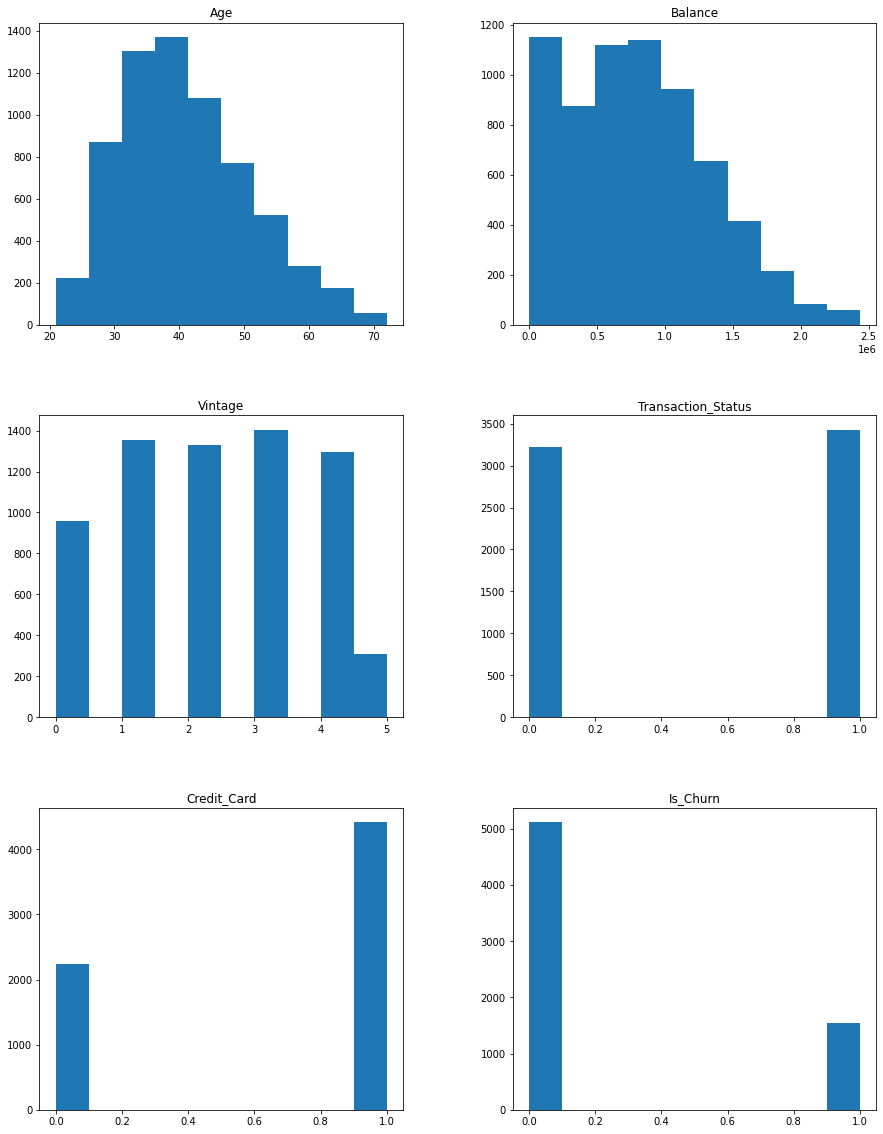

In [18]:
data.hist(figsize = (15,20), grid = False)

The balance variable has skewed distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

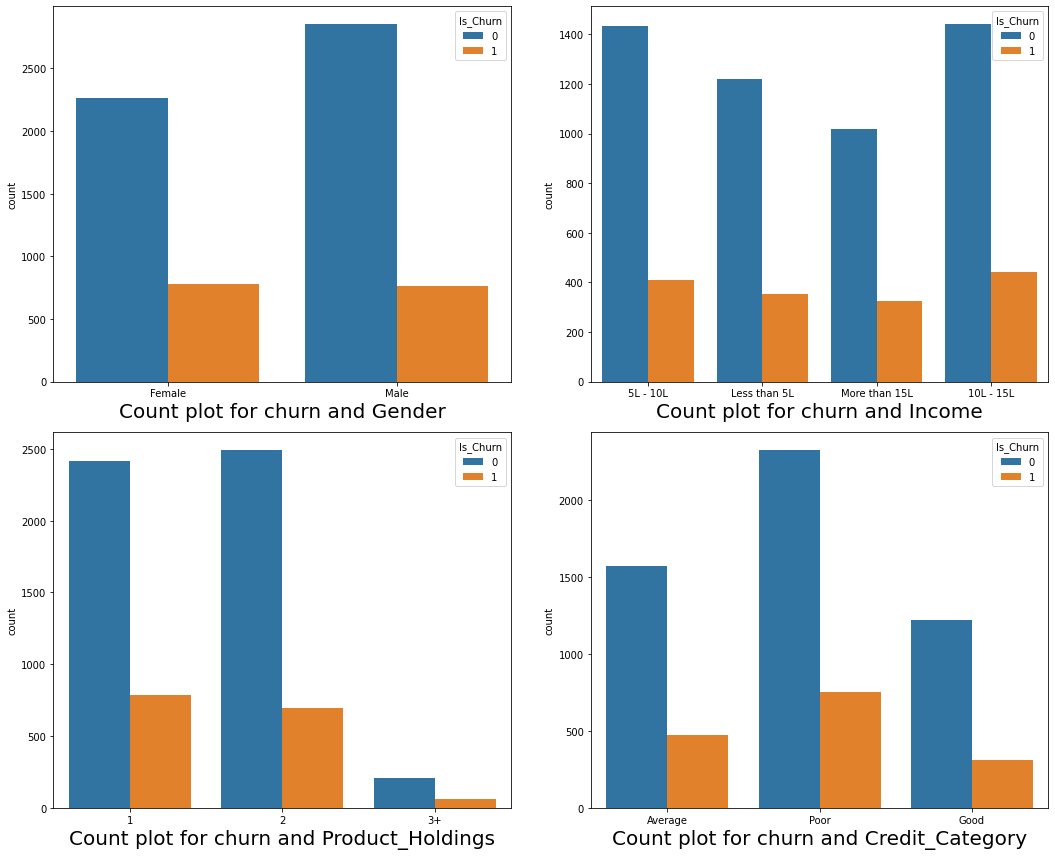

In [19]:
plt.figure(figsize = (15,12), facecolor = 'white')
graph = 1

col = ['Gender', 'Income', 'Product_Holdings', 'Credit_Category']

for i in col:
  if graph<5:
    ax = plt.subplot(2,2,graph)
    sns.countplot(data[i], hue = data['Is_Churn'])
    plt.xlabel('Count plot for churn and ' + i, fontsize = 20)
  graph+=1
plt.tight_layout()

*  Females are proportionately more likely to churn as compare to males.
*  For those with income greater than 15 lakhs are less likely to churn.
*  Those with 3+ product holdings are very less likely to churn whereas those with 1 holding are equally likely to churn as compared to those with 2 holdings.
*  Those with poor credit category has high chances of churning.

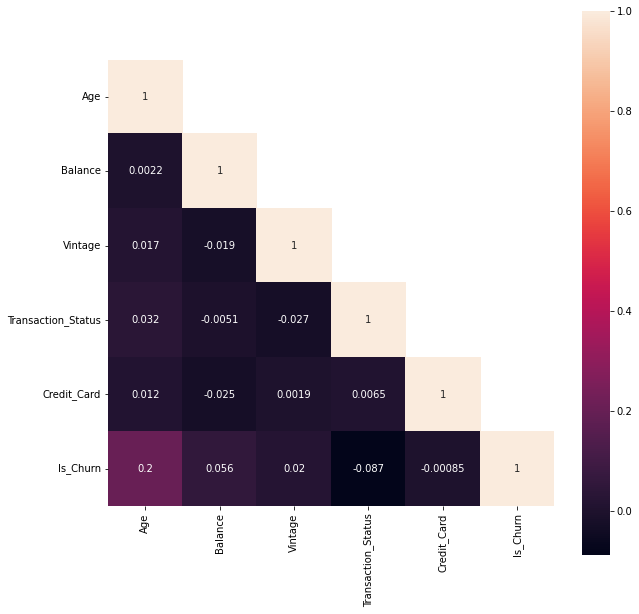

In [20]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

There is no problem of multicollinearity among the independent variables. 
Also, the age variable has relatively better correlation with the target variables as compared to the other variables.

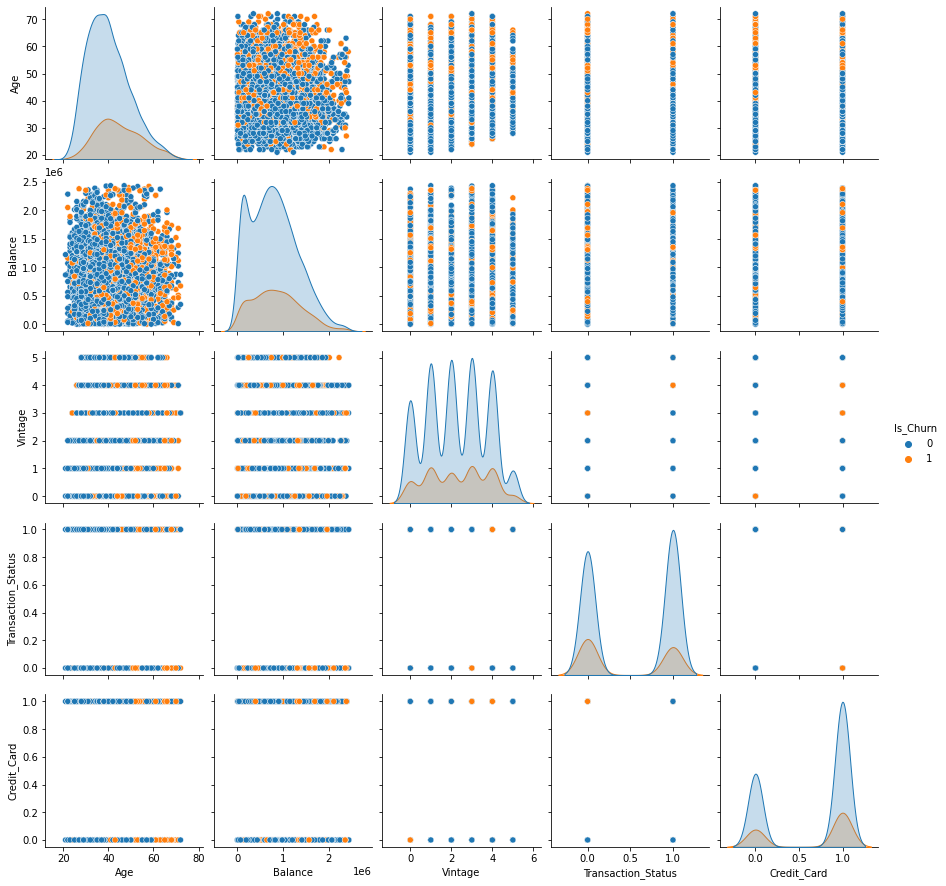

In [21]:
sns.pairplot(data, hue = 'Is_Churn')

Who are more likely to churn:
*  lower age group people
*  people with low bank balance
*  those who don't have a credit card

In [22]:
data['Product_Holdings'].unique()

array([1, 2, '3+'], dtype=object)

Since there is a value of 3+, we will not be able to process it. So, we will convert 3+ to 3.

In [23]:
data['Product_Holdings'] = data['Product_Holdings'].replace('3+',3)
data['Product_Holdings'].unique()


array([1, 2, 3])

We have converted 3+ to 3 in the product holdings column.

In [24]:
data['Product_Holdings'].astype(int)

0       1
1       1
2       2
3       2
4       1
       ..
6645    2
6646    2
6647    2
6648    2
6649    2
Name: Product_Holdings, Length: 6650, dtype: int64

Now, we have converted the products holding column from object data type to integer data type.


In [25]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

data['Gender'] = lab_enc.fit_transform(data['Gender'])
data['Income'] = lab_enc.fit_transform(data['Income'])
data['Credit_Category'] = lab_enc.fit_transform(data['Credit_Category'])

The categorical data has been converted to numerical using label encoder.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   int64  
 3   Income              6650 non-null   int64  
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   int64  
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   int64  
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 571.6+ KB


Now, all the features are numerical except the ID columns.

In [27]:
data.drop(columns = ['ID'], inplace = True)

So, we have dropped the ID column.

In [28]:
data.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,0,1,563266.44,4,0,1,0,0,1
1,53,0,2,875572.11,2,1,1,1,2,0
2,35,0,3,701607.06,2,1,2,0,2,0
3,43,0,3,1393922.16,0,1,2,1,2,1
4,39,0,3,893146.23,1,1,1,1,1,1


Now, the data looks something like this.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

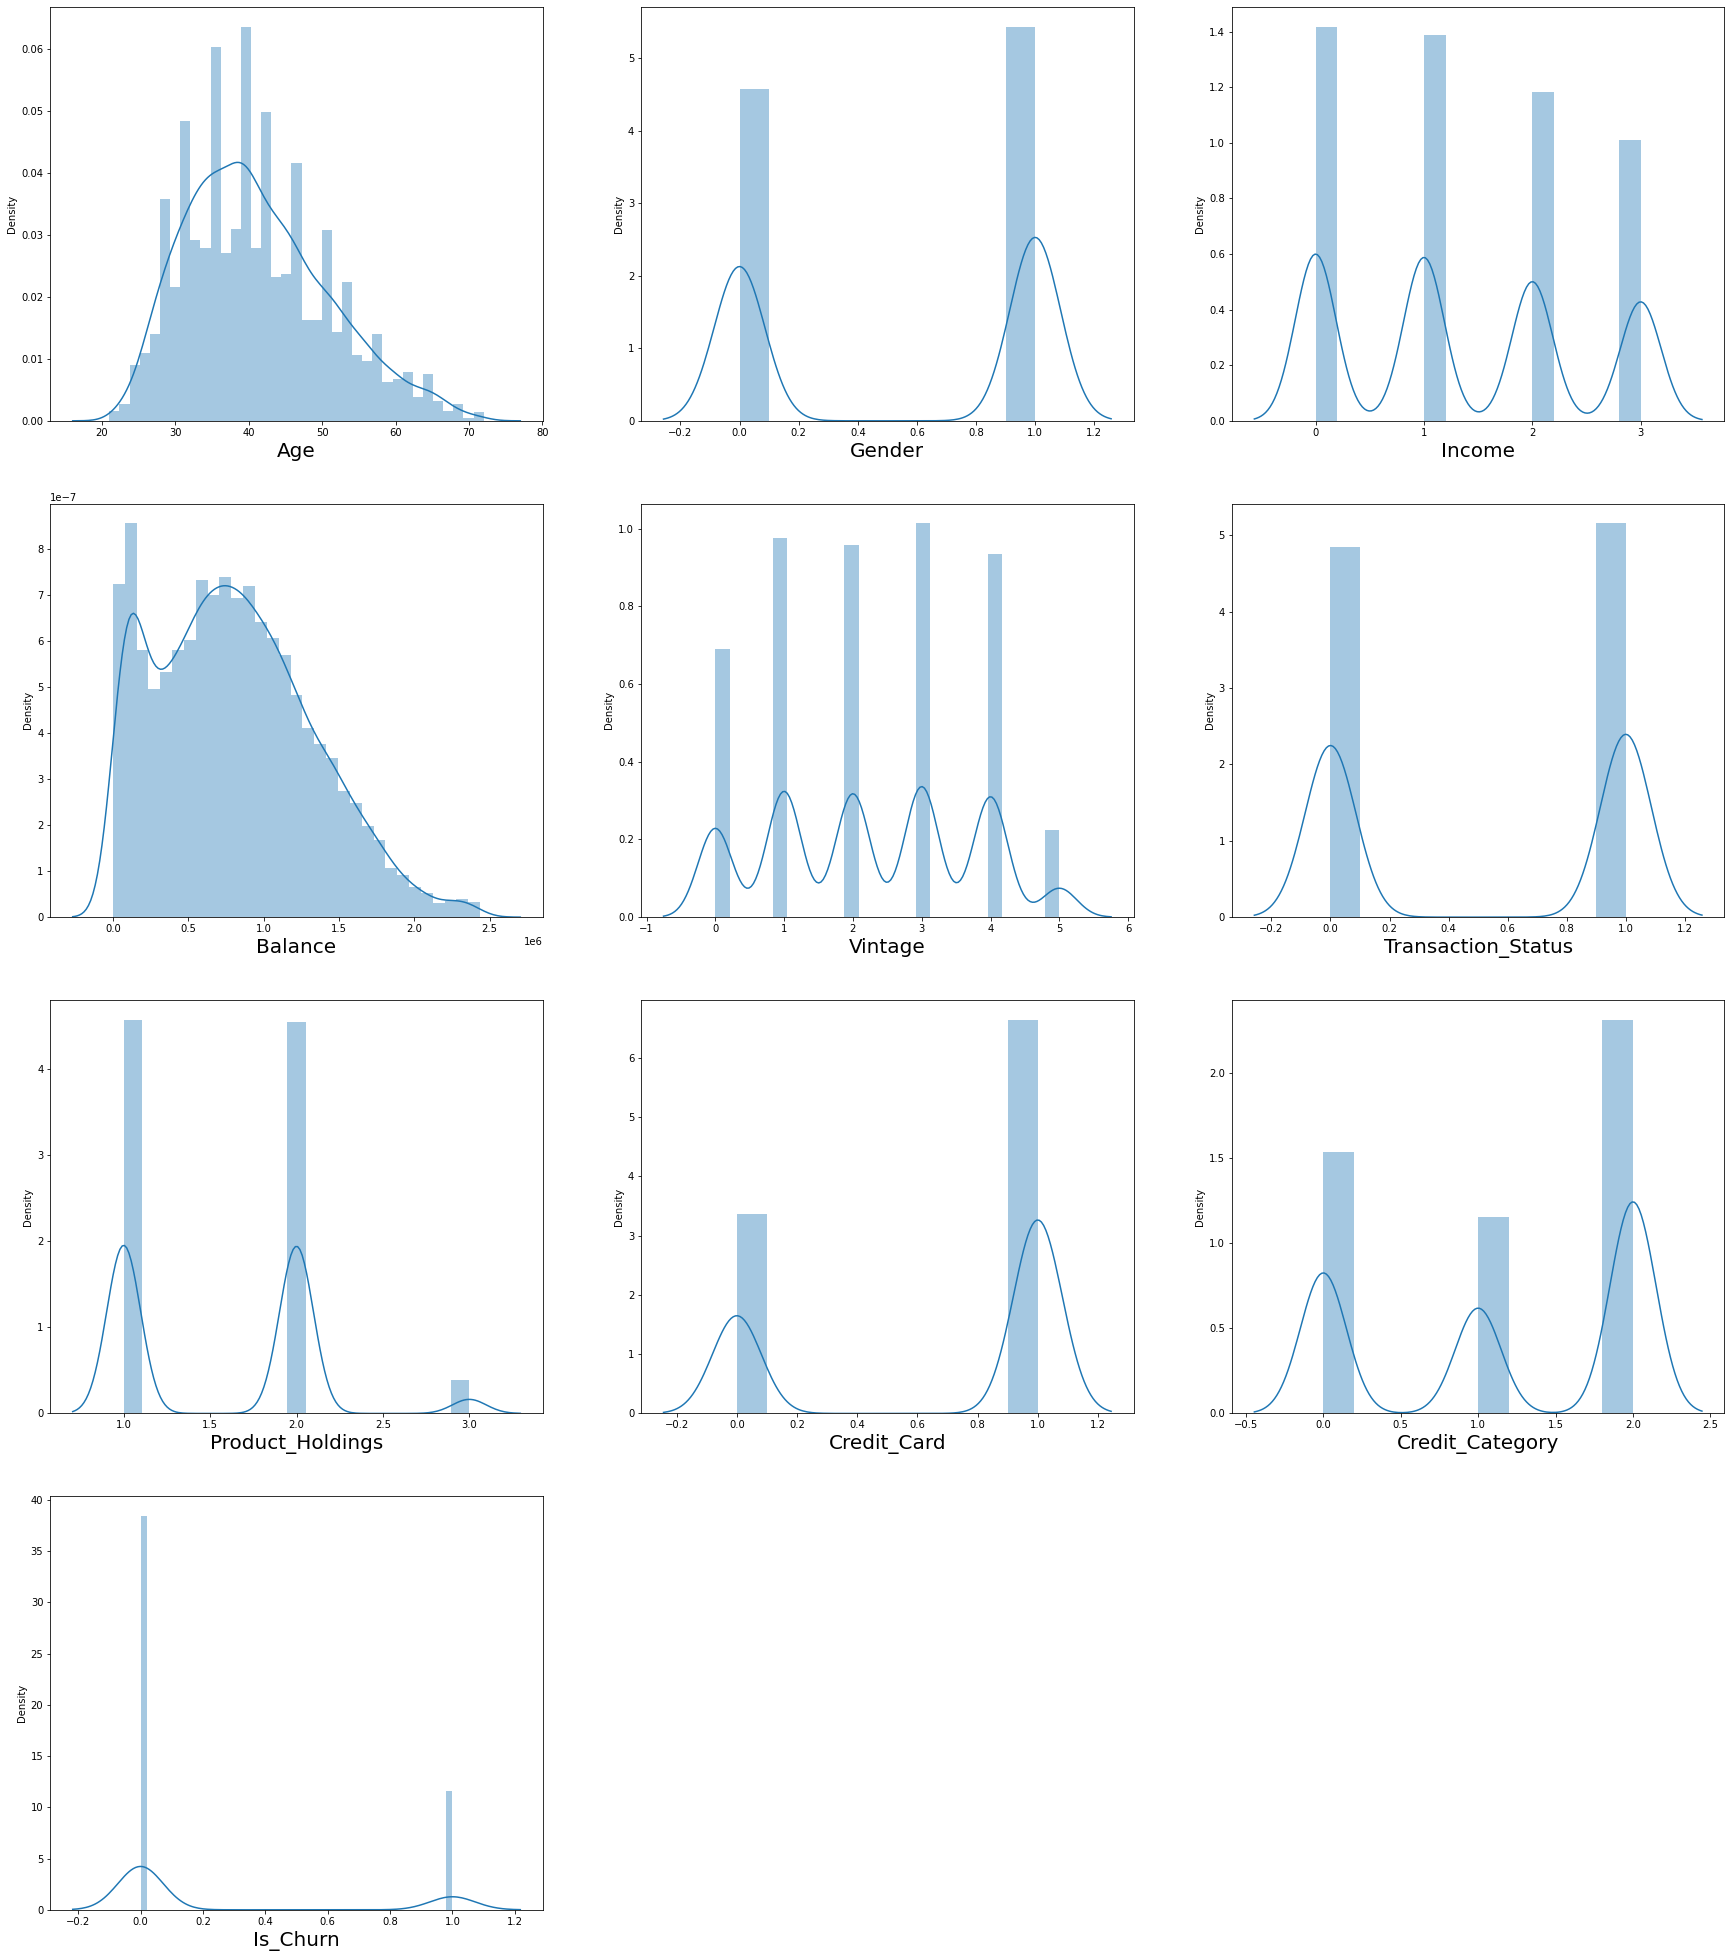

In [29]:
plt.figure(figsize = (30,35))
graph = 1

for column in data:
  if graph<=12:
    ax = plt.subplot(4,3,graph)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

We have plot these graphs to check the distribution of the data.

In [30]:
#Treating the outliers

# finding out the quantile of data with continuous columns
#so droping the categorical data
cols = data.drop(columns = ['Gender','Income','Transaction_Status', 'Credit_Card', 'Credit_Category', 'Is_Churn'])
Q1 = cols.quantile(0.25)
Q3 = cols.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
df = cols[~((cols < (Q1 -  1.5*IQR)) |(cols > (Q3 +  1.5*IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", cols.shape)
print("shape after".ljust(20),":", df.shape)
print("Percentage Loss".ljust(20),":", (cols.shape[0]-df.shape[0])/cols.shape[0])

shape before and after
shape before         : (6650, 4)
shape after          : (6555, 4)
Percentage Loss      : 0.014285714285714285


We have applied IQR method to deal with the outliers and since we are losing only 1% of the data, so we can afford to apply it.

In [31]:
df

,Age,Balance,Vintage,Product_Holdings
0,36,563266.44,4,1
1,53,875572.11,2,1
2,35,701607.06,2,2
3,43,1393922.16,0,2
4,39,893146.23,1,1
...,...,...,...,...
6645,61,1354526.19,4,2
6646,42,596286.54,3,2
6647,29,979298.19,2,2
6648,66,395233.65,3,2


These are columns on which we have removed the ouliers.

In [32]:
data1 = data.drop(columns = ['Age',	'Balance'	,'Vintage'	,'Product_Holdings'])
df1 = pd.merge(df, data1, left_index=True, right_index=True)

Merging both the datasets.

In [33]:
df1.head()

,Age,Balance,Vintage,Product_Holdings,Gender,Income,Transaction_Status,Credit_Card,Credit_Category,Is_Churn
0,36,563266.44,4,1,0,1,0,0,0,1
1,53,875572.11,2,1,0,2,1,1,2,0
2,35,701607.06,2,2,0,3,1,0,2,0
3,43,1393922.16,0,2,0,3,1,1,2,1
4,39,893146.23,1,1,0,3,1,1,1,1


Now, the data looks like this.

In [34]:
#Spliting the data

Y = df1['Is_Churn']
X = df1.drop(columns = ['Is_Churn'])

We have splitted the data. Y is the dependent variable and X are all the independent variables.

In [35]:
#Handling class imbalance problem by oversampling the minority classes.

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_over, Y_over = SM.fit_resample(X,Y)

We are over sampling to deal with the problem of imbalance class.

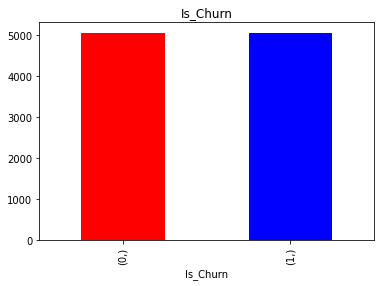

In [36]:
pd.DataFrame(Y_over).value_counts().plot(kind='bar', title='Is_Churn', color=['r','b'])

Now the dependent variable have equal class distribution.

In [37]:
y = pd.Series(Y_over)
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Is_Churn, dtype: int64

Converted the dependent variable into a series.

In [38]:
x = pd.DataFrame(X_over)
x.head()

,Age,Balance,Vintage,Product_Holdings,Gender,Income,Transaction_Status,Credit_Card,Credit_Category
0,36,563266.44,4,1,0,1,0,0,0
1,53,875572.11,2,1,0,2,1,1,2
2,35,701607.06,2,2,0,3,1,0,2
3,43,1393922.16,0,2,0,3,1,1,2
4,39,893146.23,1,1,0,3,1,1,1


Converted the independent variables into a dataframe.

In [39]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Applied standard scaler on the features to standardize them.

In [40]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,Age,1.009357
1,Balance,1.068254
2,Vintage,1.004104
3,Product_Holdings,1.087376
4,Gender,1.020094
5,Income,1.007469
6,Transaction_Status,1.024087
7,Credit_Card,1.012325
8,Credit_Category,1.003460


Calculated VIF to check whether there exists multicollinearity in the data.

In [41]:
X = pd.DataFrame(x_scaled)

Created a dataframe for the scaled values.

In [42]:
#model building

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=20)
models = [SVC(kernel = 'linear'), RandomForestClassifier(),
          LogisticRegression(), GradientBoostingClassifier()]
model_names = ['SVC', 'RandomForestClassifier', 'LogisticRegression',
               'GradientBoostingClassifier']
acc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

models = {'Modelling Algorithm': model_names, 'Accuracy': acc}
models_df = pd.DataFrame(models)
models_df

,Modelling Algorithm,Accuracy
0,SVC,0.708498
1,RandomForestClassifier,0.742095
2,LogisticRegression,0.709816
3,GradientBoostingClassifier,0.725296


Applied train test split and trained the data on various models and calculated accuracy score for all. Random Forest Regressor gives the highest accuracy.

In [43]:
SVC = SVC()
rf = RandomForestClassifier()
lr = LogisticRegression()
gb = GradientBoostingClassifier()

Instantiated all the models.

In [44]:
#Train the model using the training sets
SVC.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVC.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.719038208168643
Precision: 0.7391920623671155
Recall: 0.6825916230366492
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      1508
           1       0.74      0.68      0.71      1528

    accuracy                           0.72      3036
   macro avg       0.72      0.72      0.72      3036
weighted avg       0.72      0.72      0.72      3036



We received .71 as the f1 score for SVC model.

In [45]:
#Train the model using the training sets
rf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.7388010540184453
Precision: 0.7468099395567495
Recall: 0.7277486910994765
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1508
           1       0.75      0.73      0.74      1528

    accuracy                           0.74      3036
   macro avg       0.74      0.74      0.74      3036
weighted avg       0.74      0.74      0.74      3036



We have received 74% as the f1 score for the random forest classifier.

In [46]:
#Train the model using the training sets
lr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = lr.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.7098155467720685
Precision: 0.7166778298727394
Recall: 0.7002617801047121
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      1508
           1       0.72      0.70      0.71      1528

    accuracy                           0.71      3036
   macro avg       0.71      0.71      0.71      3036
weighted avg       0.71      0.71      0.71      3036



We have scored 71% as the f1 score for the logistic regression.

In [47]:
#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.7252964426877471
Precision: 0.7350948509485095
Recall: 0.7100785340314136
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1508
           1       0.74      0.71      0.72      1528

    accuracy                           0.73      3036
   macro avg       0.73      0.73      0.73      3036
weighted avg       0.73      0.73      0.73      3036



We have received 72% as f1 score for gradient boosting regressor.

In [48]:
#Comparing f1 score

f1_score = {'Modelling Algorithm': model_names, 'f1 score': [0.71,0.74,0.71,0.72]}
f1_df = pd.DataFrame(f1_score)
f1_df

,Modelling Algorithm,f1 score
0,SVC,0.71
1,RandomForestClassifier,0.74
2,LogisticRegression,0.71
3,GradientBoostingClassifier,0.72


Since the test metrics is f1 score, we will apply hyperparameter tuning on random forest classifier as it gives the highest f1 score among the models.

In [49]:
#Now, let's apply cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=20)
models = [SVC, RandomForestClassifier(),
          LogisticRegression(), GradientBoostingClassifier()]
model_names = ['SVC', 'RandomForestClassifier', 'LogisticRegression',
               'GradientBoostingClassifier']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, X, y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,SVC,0.718577
1,RandomForestClassifier,0.735573
2,LogisticRegression,0.706423
3,GradientBoostingClassifier,0.724012


Applied CV score to check for overfitting.

In [50]:
#Comparing CV Score and the Accuracy score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['ACCURACY'] = acc
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [acc[0] - CV_S[0], acc[1] - CV_S[1], acc[2] - CV_S[2], acc[3] - CV_S[3]]
Comparison

,Modelling Algorithm,ACCURACY,CV SCORE,Difference
0,SVC,0.708498,0.718577,-0.010079
1,RandomForestClassifier,0.742095,0.735573,0.006522
2,LogisticRegression,0.709816,0.706423,0.003393
3,GradientBoostingClassifier,0.725296,0.724012,0.001285


As the difference between the accuracy score and the CV score is very low, we can conclude that there is no overfiiting.

In [56]:
#HYPERPARAMETER TUNING:

grid_param = {
    'n_estimators' : range(80,130,10),
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : range(1,4),
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [57]:
grid = GridSearchCV(rf, param_grid = grid_param)

In [58]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 4),
                         'n_estimators': range(80, 130, 10)})

In [59]:
best_parameters = grid.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 3, 'n_estimators': 100}


In [60]:
#FINAL MODEL
#Substituting the best parameters in the Gradient Boosting Classifier:

RFC = RandomForestClassifier(criterion = 'gini', max_features = 'log2', min_samples_leaf = 3, n_estimators = 100)

RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
RFC.score(X_test,y_test)


#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1260
           1       0.75      0.71      0.73      1270

    accuracy                           0.73      2530
   macro avg       0.73      0.73      0.73      2530
weighted avg       0.73      0.73      0.73      2530



In [61]:
#SAVING THE MODEL:

import joblib
joblib.dump(RFC, 'bank_churn_model.pkl')

['bank_churn_model.pkl']

#Applying EDA on the test data

In [64]:
test = pd.read_excel('test_data_bank_churn.xlsx')
test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


Reading the test data.

In [65]:
test.shape

(2851, 10)

There are 2851 rows and 10 columns in the test data.

In [66]:
test.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

There are no null values in the test data.

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2851 non-null   object 
 1   Age                 2851 non-null   int64  
 2   Gender              2851 non-null   object 
 3   Income              2851 non-null   object 
 4   Balance             2851 non-null   float64
 5   Vintage             2851 non-null   int64  
 6   Transaction_Status  2851 non-null   int64  
 7   Product_Holdings    2851 non-null   object 
 8   Credit_Card         2851 non-null   int64  
 9   Credit_Category     2851 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 222.9+ KB


Data types of the features are same as that of the train data.

In [68]:
test.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card
count,2851.000000,2.851000e+03,2851.000000,2851.000000,2851.000000
mean,41.252192,8.098990e+05,2.220975,0.506840,0.668888
std,9.616756,5.252003e+05,1.489941,0.500041,0.470696
min,21.000000,1.503000e+03,0.000000,0.000000,0.000000
25%,34.000000,4.009684e+05,1.000000,0.000000,0.000000
50%,40.000000,7.659125e+05,2.000000,1.000000,1.000000
75%,47.000000,1.154238e+06,3.000000,1.000000,1.000000
max,72.000000,2.434834e+06,5.000000,1.000000,1.000000


Description of the test data.

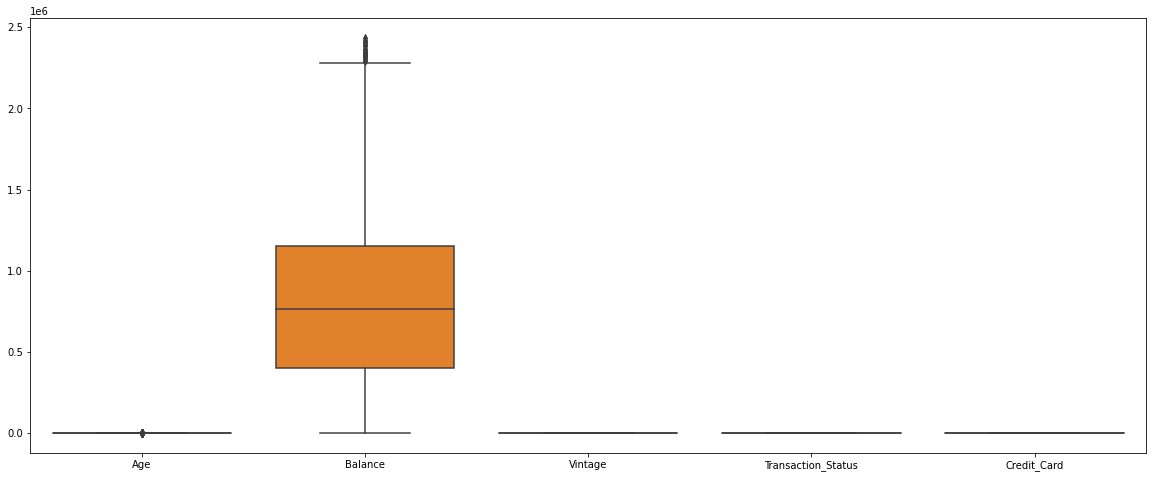

In [69]:
fig, ax = plt.subplots(1,1,figsize = (20,8))
sns.boxplot(data = test, ax = ax)
plt.show()

There are outliers in the balance feature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff21578f7d0>,
      dtype=object)

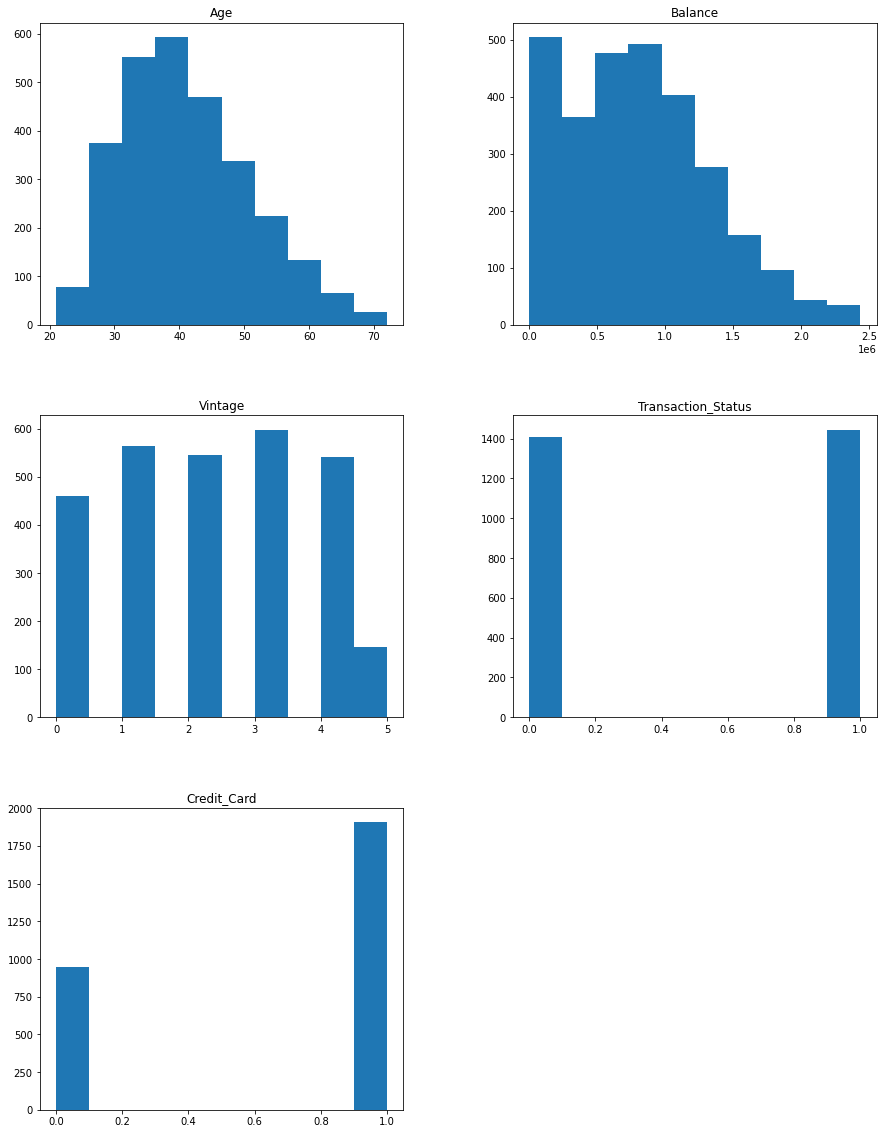

In [70]:
test.hist(figsize = (15,20), grid = False)

Analysing the distribution of the test data.

In [71]:
test['Product_Holdings'] = test['Product_Holdings'].replace('3+',3)
test['Product_Holdings'].unique()

array([2, 3, 1])

Converted 3+ in the product holdings table to 3 in order to process the data further.

In [72]:
test['Product_Holdings'].astype(int)

0       2
1       2
2       2
3       2
4       3
       ..
2846    1
2847    2
2848    1
2849    1
2850    2
Name: Product_Holdings, Length: 2851, dtype: int64

Converted the products holdings data type from object to integers.

In [73]:
lab_enc = LabelEncoder()

test['Gender'] = lab_enc.fit_transform(test['Gender'])
test['Income'] = lab_enc.fit_transform(test['Income'])
test['Credit_Category'] = lab_enc.fit_transform(test['Credit_Category'])

Applied label encoder on the test data.

In [75]:
test.drop(columns = ['ID'], inplace = True)

Dropped the ID column.

In [76]:
test_data = scaler.fit_transform(test)

Applying standard scaler on the test data.

In [77]:
# predicting on actual test data

y_result = RFC.predict(test_data)

Predicting on the test data.

In [78]:
Is_Churn = pd.Series(y_result)

Creating a series for the predicted values.

In [80]:
#creating and saving the submission file
submission = pd.read_csv('sample_OoSmYo5 (1).csv')
submission['ID'] = submission['ID']
submission['Is_Churn'] =Is_Churn
churn = pd.DataFrame(submission, columns = ['ID','Is_Churn'])
churn = churn.set_index('ID')
churn.to_csv('Bank_Churn_model.csv')

Created and saved the submission file in csv format.

In [81]:
pd.read_csv('Bank_Churn_model.csv')

,ID,Is_Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0
...,...,...
2846,19e40adf,0
2847,52d5bc8d,0
2848,f708121b,1
2849,f008715d,0


Reading the final submission file.